Utility notebook for plotting data.

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [19]:
df = pd.read_csv('part-a2/resnet50_cifar10.csv')
df = df.drop(columns=['epoch'])
df.head()

,batch,loss,accuracy
0,100,0.585643,0.800625
1,200,0.585091,0.793750
2,300,0.599921,0.799375
3,400,0.551229,0.811562
4,500,0.593399,0.793125


In [20]:
dfs = []
titles = ['resnet50_cifar10', 'resnet50_cifar100', 'resnet50_tiny_imagenet', 'vgg19_cifar10', 'vgg19_cifar100', 'vgg19_tiny_imagenet']

dfs.append(df)
dfs.append(pd.read_csv('part-a2/resnet50_cifar100.csv'))
dfs.append(pd.read_csv('part-a2/resnet50_tiny_imagenet.csv'))
dfs.append(pd.read_csv('part-a2/vgg19_cifar10.csv'))
dfs.append(pd.read_csv('part-a2/vgg19_cifar100.csv'))
dfs.append(pd.read_csv('part-a2/vgg19_tiny_imagenet.csv'))

len(dfs)

6

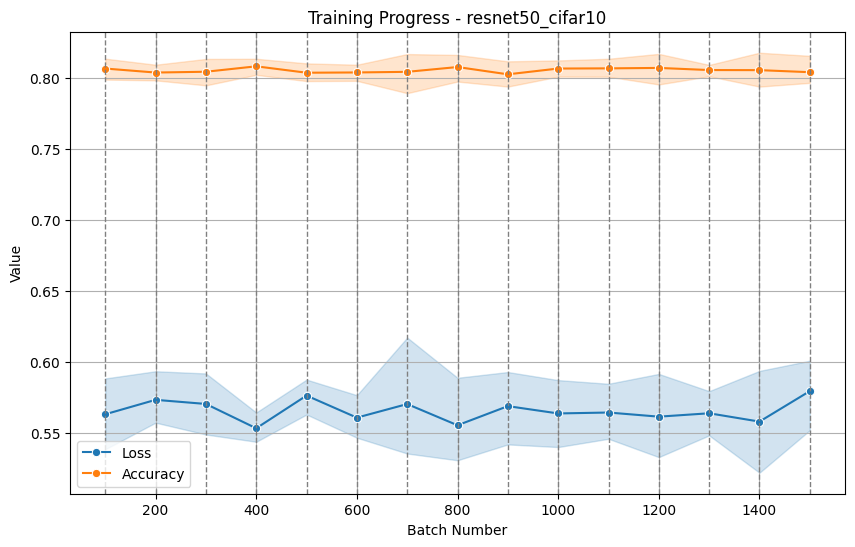

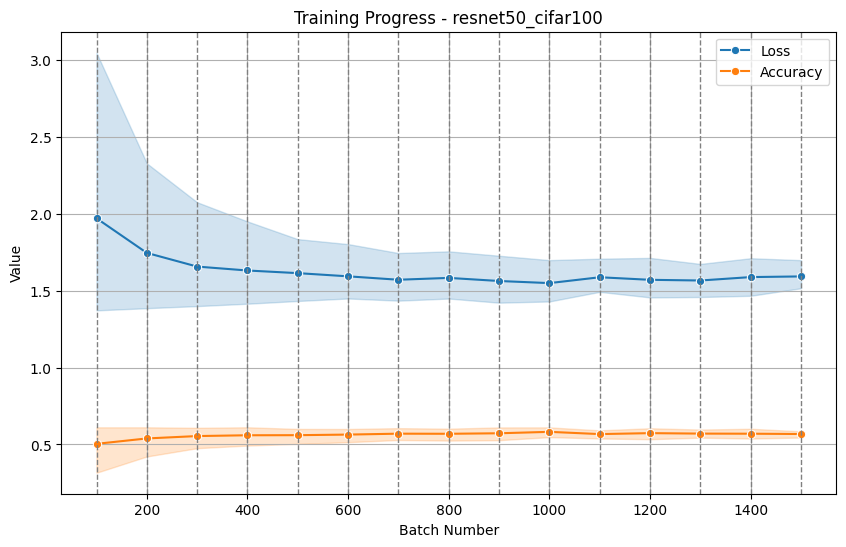

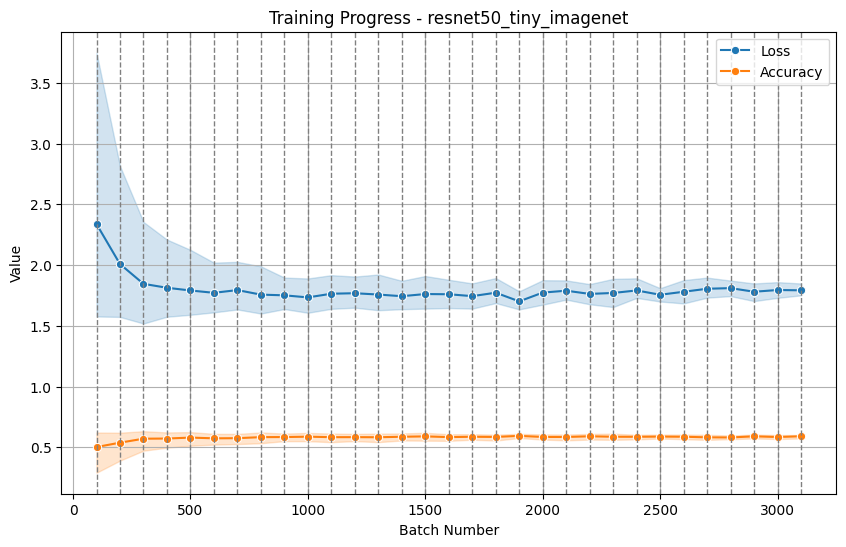

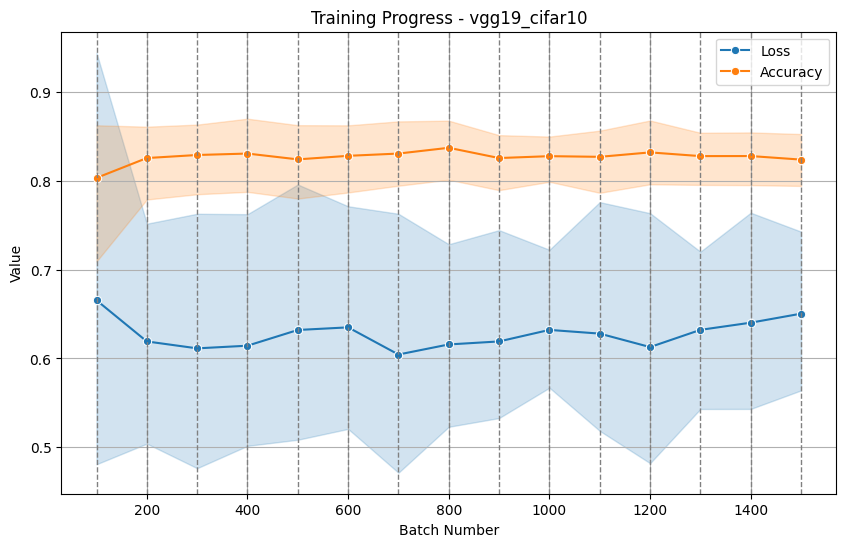

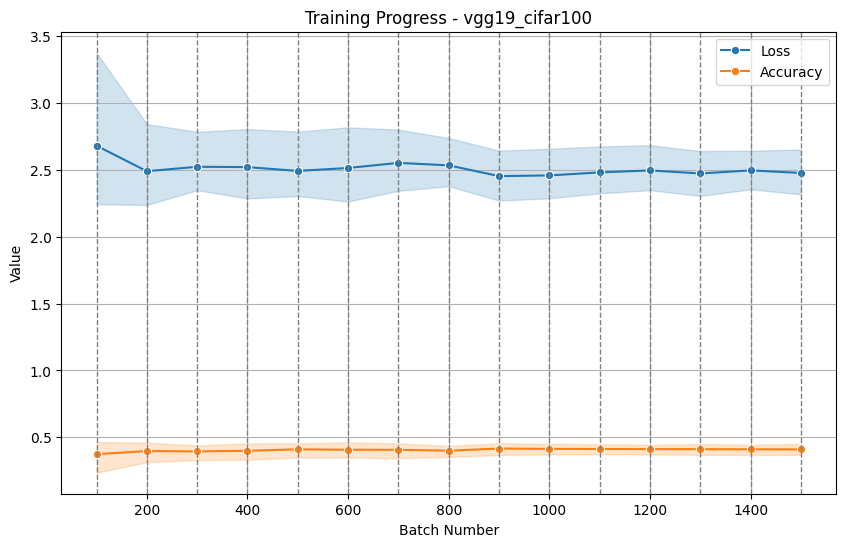

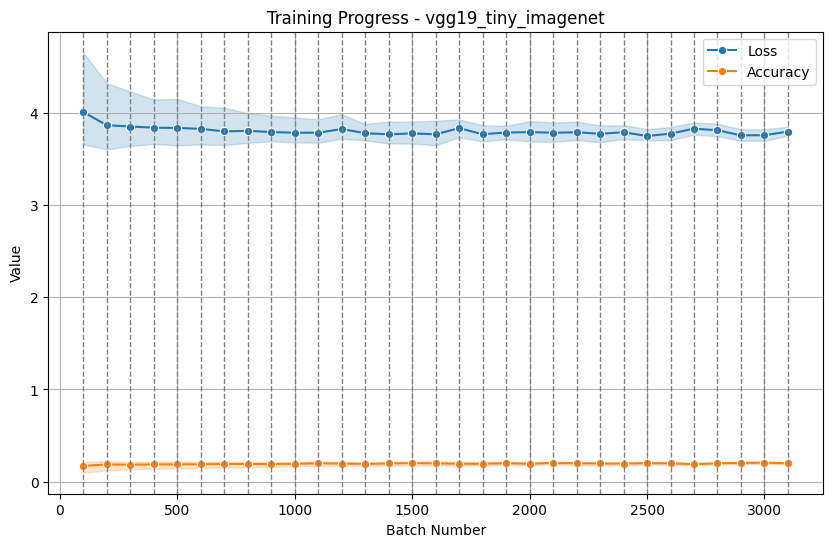

In [21]:
for i, df in enumerate(dfs):
    # Creating the plot
    plt.figure(figsize=(10, 6))

    # Plotting the loss and accuracy
    sns.lineplot(data=df, x='batch', y='loss', label='Loss', marker='o')
    sns.lineplot(data=df, x='batch', y='accuracy', label='Accuracy', marker='o')

    # Setting titles and labels
    plt.title(f'Training Progress - {titles[i]}')
    plt.xlabel('Batch Number')
    plt.ylabel('Value')

    # Adding vertical lines at each new epoch (every 100 batches)
    epoch_starts = np.arange(100, df['batch'].max() + 100, 100)
    for epoch in epoch_starts:
        plt.axvline(x=epoch, color='grey', linestyle='--', linewidth=1)

    plt.legend()
    plt.grid(True)
    plt.show()


In [22]:
df = pd.read_csv('part-a2/test_perf.csv')
df.head()

,model,dataset,test_loss,test_acc
0,resnet,tiny_image_net,1.827040,0.6016
1,resnet,cifar10,2.374048,0.0802
2,resnet,cifar100,1.652995,0.5761
3,vgg19,cifar10,0.527831,0.8614
4,vgg19,cifar100,1.945256,0.4981


NameError: name 'data' is not defined

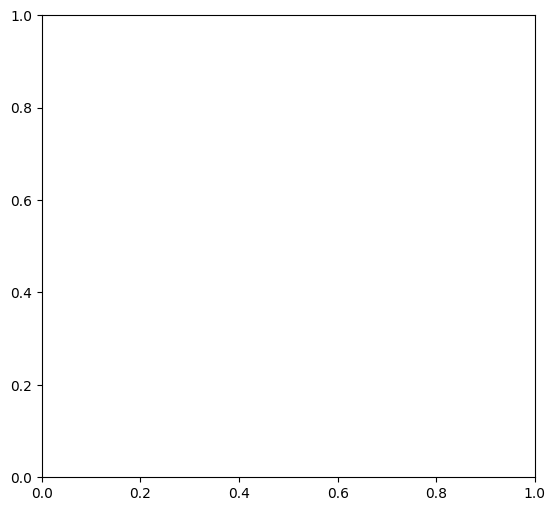

In [23]:
# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot for test_loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='dataset', y='test_loss', hue='model', data=df)
plt.title('Test Loss by Dataset and Model')
plt.xlabel('Dataset')
plt.ylabel('Test Loss')

# Plot for test_acc
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='dataset', y='test_acc', hue='model', data=df)
plt.title('Test Accuracy by Dataset and Model')
plt.xlabel('Dataset')
plt.ylabel('Test Accuracy')

# Show plot
plt.tight_layout()
plt.show()